<h1>2.1 Linear Regression 1D: Prediction</h1>


The following are the libraries we are going to use for this lab.


In [1]:
# These are the libraries will be used for this lab.

import torch

<h2 id="Prediction">2.1.1. Prediction</h2>


Let us create the following expressions:


$b=-1,w=2$

$\hat{y}=-1+2x$


First, define the parameters:


In [2]:
# Define w = 2 and b = -1 for y = wx + b
# 학습해야되기 때문에 requres_grad = True

w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)

Then, define the function <code>forward(x, w, b)</code> makes the prediction: 


In [3]:
# Function forward(x) for prediction
# w: weight, b: bias

def forward(x):
  yhat = w * x + b
  return yhat

Let's make the following prediction at <i>x = 1</i>


$\hat{y}=-1+2x$

$\hat{y}=-1+2(1)$


In [4]:
# Predict y = 2x - 1 at x = 1

x = torch.tensor([[1.0],[2.0]]) # 2 row, 1 col
yhat = forward(x)
print("The prediction: ", yhat)

The prediction:  tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


In [5]:
# Create x Tensor and check the shape of x tensor

x = torch.tensor([[1.0], [2.0]])
print("The shape of x: ", x.shape)

The shape of x:  torch.Size([2, 1])


Now make the prediction: 


In [6]:
# Make the prediction of y = 2x - 1 at x = [1, 2]

yhat = forward(x)
print("The prediction: ", yhat)

The prediction:  tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


<!--Empty Space for separating topics-->


<h2 id="Linear">2.1.2. Class Linear</h2>


The linear class can be used to make a prediction. We can also use the linear class to build more complex models. Let's import the module:


In [7]:
# Import Class Linear

from torch.nn import Linear

Set the random seed because the parameters are randomly initialized:


In [8]:
# Set random seed

torch.manual_seed(1) # seed 고정하는 이유: linear를 밑에 불렀을때 w,b가 seed에 따라서 달라짐. 모듈 자체가 initializing 하기 때문에 값이 달라진다.

Let us create the linear object by using the constructor. The parameters are randomly created. Let us print out to see what <i>w</i> and <i>b</i>. The parameters of an <code>torch.nn.Module</code> model are contained in the model’s parameters accessed with <code>lr.parameters()</code>:


In [9]:
# Create Linear Regression Model, and print out the parameters
# in_features: the size of each input sample or number of columns 
# parameters[0]: slope, parameters[1]: bias
# seed에 따라 값이 달라짐.

lr = Linear(in_features=1, out_features=1, bias=True) # feature 개수: 하나의 feature 값만 넣을꺼라 1 넣음, bias=T 우리가 학습할 파라미터다
print("Parameters w and b: ", list(lr.parameters())) 

Parameters w and b:  [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [13]:
# 중간실습

lr.parameters()

<generator object Module.parameters at 0x7fa44b51da50>

This is equivalent to the following expression:  


$b=-0.44, w=0.5153$

$\hat{y}=-0.44+0.5153x$


A method  <code>state_dict()</code> Returns a Python dictionary object corresponding to the layers of each parameter  tensor. 


In [14]:
print("Python dictionary: ",lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())

Python dictionary:  OrderedDict([('weight', tensor([[0.5153]])), ('bias', tensor([-0.4414]))])
keys:  odict_keys(['weight', 'bias'])
values:  odict_values([tensor([[0.5153]]), tensor([-0.4414])])


In [17]:
# lr.state_dict()['weight'].data
# lr.state_dict()['weight'].data.numpy

<function Tensor.numpy>

The keys correspond to the name of the attributes and the values correspond to the parameter value.


In [15]:
print("weight:",lr.weight)
print("bias:",lr.bias)

weight: Parameter containing:
tensor([[0.5153]], requires_grad=True)
bias: Parameter containing:
tensor([-0.4414], requires_grad=True)


In [18]:
# value 가져오기
# lr.weight.detach().numpy()

array([[0.5152632]], dtype=float32)

Now let us make a single prediction at <i>x = [[1.0]]</i>.


In [20]:
# Make the prediction at x = [[1.0]]

x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.0739]], grad_fn=<AddmmBackward>)


Use model <code>lr(x)</code> to predict the result.


In [21]:
# Create the prediction using linear model

x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


<!--Empty Space for separating topics-->


<h2 id="Cust">2.1.3. Build Custom Modules</h2>


Now, let's build a custom module. We can make more complex models by using this method later on. 


First, import the following library.


In [22]:
# Library for this section

from torch import nn

Now, let us define the class: 


In [26]:
lr=nn.Linear(1,1)
x=torch.tensor([3.0])
lr.weight
lr.bias
lr(x)

tensor([-0.1084], grad_fn=<AddBackward0>)

In [30]:
# Customize Linear Regression Class

class LR(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        
        # Inherit from parent 
        # input과 output의 크기를 상속받는다.
        # super -> nn.Linear가 object를 생성함. 따로 초기화 하지 않고.
        super(LR, self).__init__() # forward 바로 불러와주는 기능인듯
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

In [31]:
# lr = LR(1,1) super() 반드시 있어야 돌아감

Create an object by using the constructor. Print out the parameters we get and the model.


In [32]:
# Create the linear regression model. Print out the parameters.

lr = LR(1, 1)
print("The parameters: ", list(lr.parameters()))
print("Linear model: ", lr.linear)

The parameters:  [Parameter containing:
tensor([[-0.0729]], requires_grad=True), Parameter containing:
tensor([-0.0900], requires_grad=True)]
Linear model:  Linear(in_features=1, out_features=1, bias=True)


In [33]:
lr = LR(1, 1)
lr.state_dict()['linear.weight'].data[0] = torch.tensor([0.5153])
lr.state_dict()['linear.bias'].data[0] = torch.tensor([-0.4414])

Let us try to make a prediction of a single input sample.


In [34]:
# Try our customize linear regression model with single input

x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.0739]], grad_fn=<AddmmBackward>)


Now, let us try another example with multiple samples.


In [35]:
# Try our customize linear regression model with multiple input

x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.0739],
        [0.5892]], grad_fn=<AddmmBackward>)


the parameters are also stored in an ordered dictionary :


In [36]:
print("Python dictionary: ", lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())

Python dictionary:  OrderedDict([('linear.weight', tensor([[0.5153]])), ('linear.bias', tensor([-0.4414]))])
keys:  odict_keys(['linear.weight', 'linear.bias'])
values:  odict_values([tensor([[0.5153]]), tensor([-0.4414])])


 <!-- Your answer is below:
x=torch.tensor([[1.0],[2.0],[3.0]])
lr1=LR(1,1)
yhat=lr1(x)
yhat
-->


<h1>2.2 Linear Regression 1D: Training One Parameter</h1>


<h2>Objective</h2><ul><li> How to create cost or criterion function using MSE (Mean Square Error).</li></ul> 


<h2>Preparation</h2>


The following are the libraries we are going to use for this lab.


In [37]:
# These are the libraries will be used for this lab.

import numpy as np
import matplotlib.pyplot as plt

The class <code>plot_diagram</code> helps us to visualize the data space and the parameter space during training and has nothing to do with PyTorch.


In [38]:
# The class for plotting w,b 주어졌을때 바뀌는 loss 값들 바탕으로 그린듯

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2>


Generate values from -3 to 3 that create a line with a slope of -3. This is the line you will estimate.


In [39]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1) #np.linespace랑 똑같은 역할
f = -3 * X # x,y 갖고 linear regression training 위해

Let us plot the line.


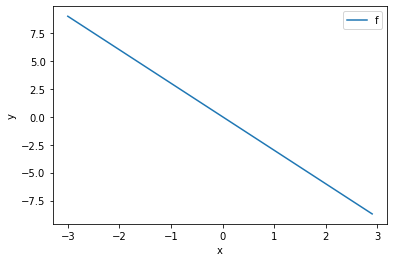

In [40]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Let us add some noise to the data in order to simulate the real data. Use <code>torch.randn(X.size())</code> to generate Gaussian noise that is the same size as <code>X</code> and has a standard deviation opf 0.1.


In [41]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

Plot the <code>Y</code>: 


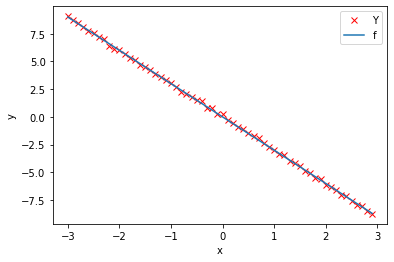

In [42]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h2 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h2>


In this section, let us create the model and the cost function (total loss) we are going to use to train the model and evaluate the result.


First, define the <code>forward</code> function $y=w*x$. (We will add the bias in the next lab.)


In [43]:
# Create forward function for prediction 

def forward(x):
    return w * x

Define the cost or criterion function using MSE (Mean Square Error): 


In [44]:
# Create the MSE function for evaluate the result. = loss function

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Define the learning rate <code>lr</code> and an empty list <code>LOSS</code> to record the loss for each iteration:   


In [45]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

Now, we create a model parameter by setting the argument <code>requires_grad</code> to <code> True</code> because the system must learn it.


In [46]:
# w: slope. 학습을 위해 require_grad = True

w = torch.tensor(-10.0, requires_grad = True) 

Create a <code>plot_diagram</code> object to visualize the data space and the parameter space for each iteration during training:


In [47]:
gradient_plot = plot_diagram(X, Y, w, stop = 5) # stop=5 : plot diagra에서 torch.arange(start,stop) 처음 w~stop까지 그려주는것. 처음에 -10으로 줬고 -5까지 주겠다

<!--Empty Space for separating topics-->


<h2 id="Train">Train the Model</h2>


Let us define a function for training the model. The steps will be described in the comments.


In [48]:
# Define a function for train the model 어떻게 학습시키는지

def train_model(iter):
    for epoch in range (iter): # epoch만큼 반복되게~
        
        # make the prediction as we learned in the last lab # w*x
        Yhat = forward(X) 
        
        # calculate the iteration # mse
        loss = criterion(Yhat,Y) 
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters : 원래 w에서 학습률 * grad
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass -> w.grad.data=0로 만들어줌, 안그러면 pytorch에서 계속 같은거 더해서 zero 단계 필요. 우리는 값 바꿔가면서 계산해야해서??
        w.grad.data.zero_()

Let us try to run 4 iterations of gradient descent:  


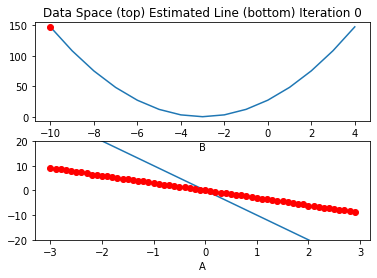

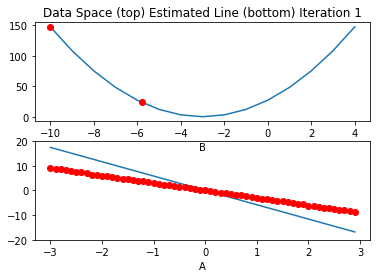

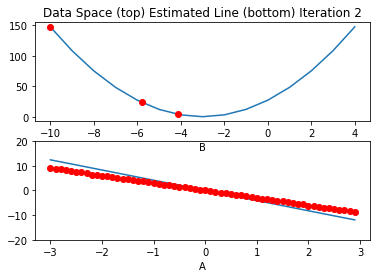

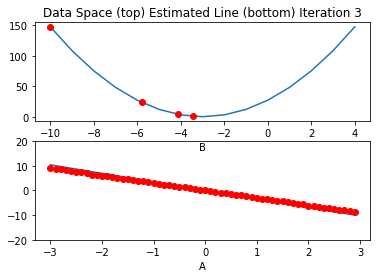

<Figure size 432x288 with 0 Axes>

In [49]:
# Give 4 iterations for training the model here.

train_model(4) # epoch=4 : -10부터 plotting, 점점 loss 작아지고 원래 선에 가까워짐

Plot the cost for each iteration: 


Text(24.0, 0.5, 'Cost')

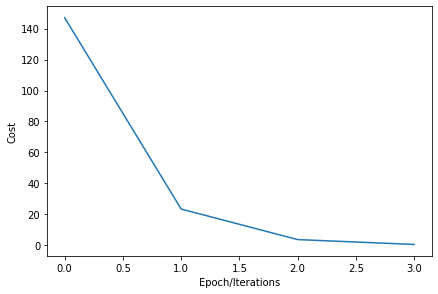

In [50]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<!--Empty Space for separating topics-->


<h3>Practice</h3>


1) Create a new learnable parameter <code>w</code> with an initial value of -15.0.


In [52]:
# Practice: Create w with the inital value of -15.0

w = torch.tensor(-15.0, requires_grad=True)

Double-click <b>here</b> for the solution.

<!-- Your answer is below:
w = torch.tensor(-15.0, requires_grad=True)
-->


2) Create an empty list <code>LOSS2</code>:


In [53]:
# Practice: Create LOSS2 list

LOSS2 = []

Double-click <b>here</b> for the solution.

<!-- Your answer is below:
LOSS2 = []
-->


3) Write your own <code>my_train_model</code> function with loss list <code>LOSS2</code>. And run it with 4 iterations.


In [ ]:
# Practice: Create your own my_train_model



4) Plot an overlay of the list <code>LOSS2</code> and <code>LOSS</code>. 


In [ ]:
# Practice: Plot the list LOSS2 and LOSS



What does this tell you about the parameter value? 


<h1>2.3 Linear regression 1D: Training Two Parameter</h1>


<h2>Objective</h2><ul><li> How to train the model and visualize the loss results.</li></ul> 


<h2>Preparation</h2>


We'll need the following libraries:  


In [54]:
# These are the libraries we are going to use in the lab.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with PyTorch. 


In [55]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2) # mse
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

## np.meshgrid

In [56]:
import numpy as np

w_range = 5; b_range = 3; n_samples = 10
W = np.linspace(-w_range, w_range, n_samples)
B = np.linspace(-b_range, b_range, n_samples)
w, b = np.meshgrid(W, B)

print(w[0])
print(b[0])

[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]
[-3. -3. -3. -3. -3. -3. -3. -3. -3. -3.]


Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


<Figure size 432x288 with 0 Axes>

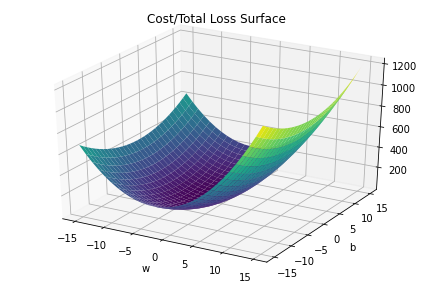

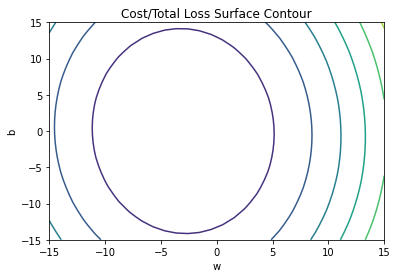

In [57]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 15, X, Y, 30)

<!--Empty Space for separating topics-->


<h2 id="Train">Train the Model</h2>


First, define the <code>forward</code> function $y=w*x+b$.

In [58]:
# Create forward function for prediction 

def forward(x):
    return w * x + b

Define the cost or criterion function using MSE (Mean Square Error): 


In [59]:
# Create the MSE function for evaluate the result. = loss function

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Create model parameters <code>w</code>, <code>b</code> by setting the argument <code>requires_grad</code> to True because we must learn it using the data.


In [60]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

Set the learning rate to 0.1 and create an empty list <code>LOSS</code> for storing the loss for each iteration.


In [61]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS = []

Define <code>train_model</code> function for train the model.


In [62]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        # store the loss in the list LOSS
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

Run 15 iterations of gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space 


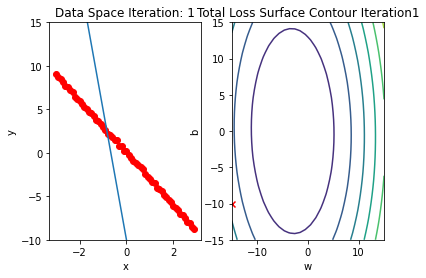

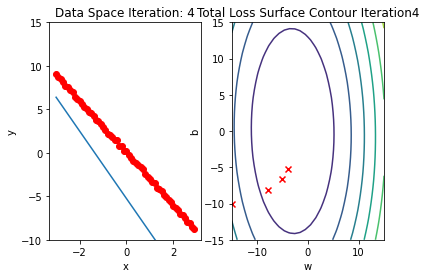

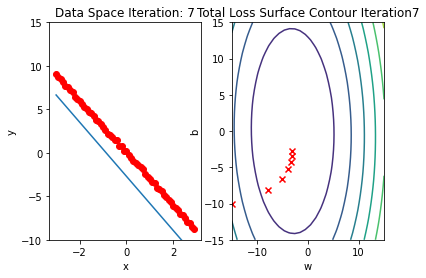

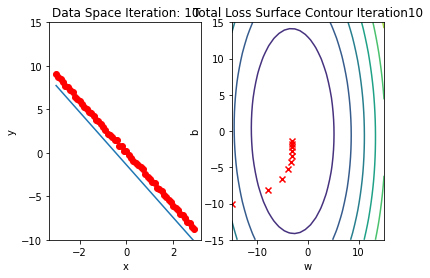

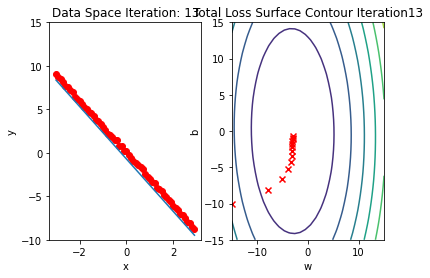

In [63]:
# Train the model with 15 iterations

train_model(15)

Plot total loss/cost surface with loss values for different parameters in red:


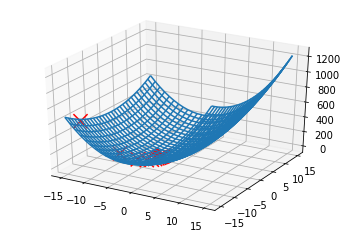

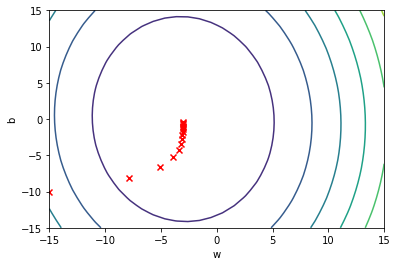

Text(24.125, 0.5, 'Cost')

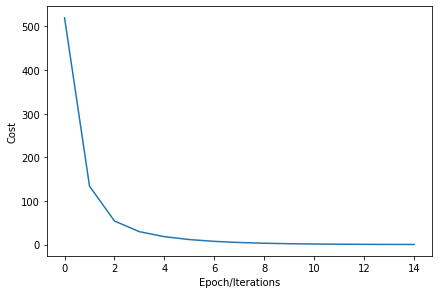

In [64]:
# Plot out the Loss Result

get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<h3>Practice</h3>


Experiment using s learning rates 0.2 and width the following parameters. Run 15 iterations.


In [65]:
# Practice: train and plot the result with lr = 0.2 and the following parameters

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.2
LOSS2 = []


Double-click <b>here</b> for the solution.

<!-- 
def my_train_model(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
        LOSS2.append(loss)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
my_train_model(15)
-->


Plot the <code>LOSS</code> and <code>LOSS2</code>


In [ ]:
# Practice: Plot the LOSS and LOSS2 in order to compare the Total Loss


Double-click <b>here</b> for the solution.

<!--
plt.plot(LOSS, label = "LOSS")
plt.plot(LOSS2, label = "LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()
-->
